In [1]:
import uproot
import numpy as np
import sys

import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, '..')

from eventContainer import eventContainer
from hitClass import recHitContainer
from superCluster import superCluster
from truthCluster import truthCluster
from singleLayerCluster import singleLayerCluster
from multiDepthCluster import multiDepthCluster

import helperV2

from exampleMLBasedCluster import exampleMLBasedCluster

Welcome to JupyROOT 6.24/00


In [3]:
file1 = uproot.open('../merged_tree_Hannahchanges_20230615.root')
tree1 = file1['event_tree']
branches1 = tree1.arrays()

In [4]:
#This took me about 107 seconds on my macbook
diffs = []
for ev in range(1001):
    if(ev%100==0):
        print(ev)
    testev = eventContainer(ev, branches1)
    if(testev.tower_LFHCAL_N < 1):
        continue
    
    truthClusters = helperV2.makeTruthClusters(testev)
    
    listOfSCs = helperV2.runClusterizer(testev)
    combinedListOfSCs = helperV2.combineSuperClustersInLayer(listOfSCs)
    allClusters = helperV2.makeAllClusters(testev, combinedListOfSCs)
    layeredClusters = helperV2.makeLayeredClusters(allClusters)
    multiDepthClusters = helperV2.makeMultiDepthClusters(testev, layeredClusters)
    matchedClusters = helperV2.doClusterMatching(truthClusters, multiDepthClusters)
    
    tmpDiffs = helperV2.findMatchedDiffs(matchedClusters, truthClusters, multiDepthClusters)
    if(tmpDiffs is not None):
        diffs += tmpDiffs
    

0
100
200
300
400
500
600
700
800
900
1000


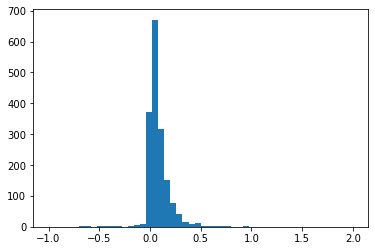

In [5]:
test = plt.hist(diffs, bins = 50, range=[-1,2])

In [6]:
#Running a single cluster
testev = eventContainer(60, branches1)
if(testev.tower_LFHCAL_N > 0):

    truthClusters = helperV2.makeTruthClusters(testev)

    listOfSCs = helperV2.runClusterizer(testev)
    combinedListOfSCs = helperV2.combineSuperClustersInLayer(listOfSCs)
    allClusters = helperV2.makeAllClusters(testev, combinedListOfSCs)
    layeredClusters = helperV2.makeLayeredClusters(allClusters)
    multiDepthClusters = helperV2.makeMultiDepthClusters(testev, layeredClusters)
    matchedClusters = helperV2.doClusterMatching(truthClusters, multiDepthClusters)

    tmpDiffs = helperV2.findMatchedDiffs(matchedClusters, truthClusters, multiDepthClusters)

38.03566100161947 -43.537318409570126 -53.14752116328707 397.4390348658607


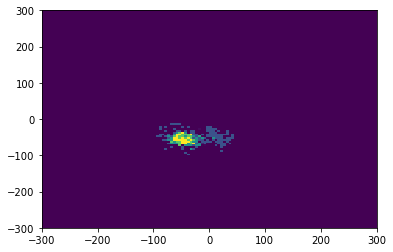

22.876600115397416 5.9147903830154815 -44.289463547276384 372.33547591985445


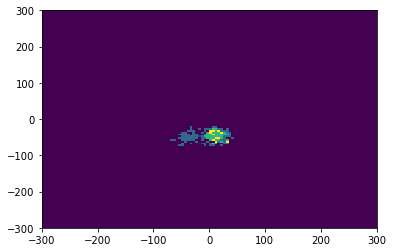

In [7]:
"""
Visualize two clusters.  In this instance, I know that event 60 has two nearby clusters
This is a bit of an illustration of why I might want to add in cluster pruning
to get rid of the "ghost" cluster components underneath the other clusters
In any case, you can compare the energy and position information with the next cell
and see that the reco clusters *are* pretty similar to the truth ones
"""
c=0
print(multiDepthClusters[c].energy,
      multiDepthClusters[c].posx,
      multiDepthClusters[c].posy,
      multiDepthClusters[c].posz)
test2 = plt.hist2d(list(testev.tower_LFHCAL_posx[multiDepthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[multiDepthClusters[c].hitIndices]),
                   weights=list(multiDepthClusters[c].hitFracs),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])
plt.show()
c=1
print(multiDepthClusters[c].energy,
      multiDepthClusters[c].posx,
      multiDepthClusters[c].posy,
      multiDepthClusters[c].posz)
test3 = plt.hist2d(list(testev.tower_LFHCAL_posx[multiDepthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[multiDepthClusters[c].hitIndices]),
                   weights=list(multiDepthClusters[c].hitFracs),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])

In [8]:
#See superEvent_Example for plotting truth clusters and plotting with energy weighting

In [10]:
ML_Cluster_Example = exampleMLBasedCluster(testev, multiDepthClusters[0].hitIndices, multiDepthClusters[0].hitFracs)
ML_Cluster_Example.calculateCluster()

38.03566100161947 -43.537318409570126 -53.14752116328707 397.4390348658607


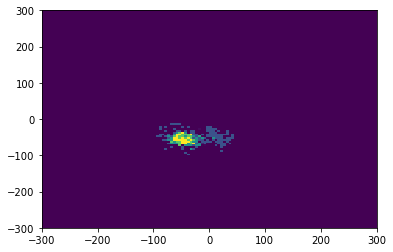

In [12]:
print(ML_Cluster_Example.energy, ML_Cluster_Example.posx, ML_Cluster_Example.posy, ML_Cluster_Example.posz)
test3 = plt.hist2d(list(testev.tower_LFHCAL_posx[ML_Cluster_Example.hitIndices]),
                   list(testev.tower_LFHCAL_posy[ML_Cluster_Example.hitIndices]),
                   weights=list(ML_Cluster_Example.hitFracs),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])